In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [169]:
## This method is for determening outliers
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_ouliers = Q3 + 1.5 * IQR
    lower_outliers = Q1 - 1.5 * IQR
    outliers = series[(series < lower_outliers) | (series > upper_ouliers)]
    return len(outliers)

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]  

## Content of the tables
### Chemicals table - all of the concentration of the specific chemical, code for the sensor, amount of water(all the data is from 2023)
### Merged_oxygen table - the code of the sensor(it is either 01/07, but it is the same sensor), amount of oxygen, start time, end time(data from 2021)


In [239]:
ammonium = pd.read_parquet('data/Chemical measurements influent 2023_2024/ammonium_2024.parquet')
ammonium = ammonium.rename(columns={"hstWaarde": "hstWaarde_ammonium_2023", "historianTagnummer": "historianTagnummer_ammonium", "datumBeginMeting": "datumBeginMeting_ammonium", "datumEindeMeting": "datumEindeMeting_ammonium"}).reset_index(drop=True)
ammonium['hstWaarde_ammonium_2023'] = ammonium['hstWaarde_ammonium_2023'].apply(pd.to_numeric, errors='coerce')

Number of outliers:  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d847d9a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d848026f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d8481c500>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d84ed0fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d84ed3aa0>],
 'means': []}

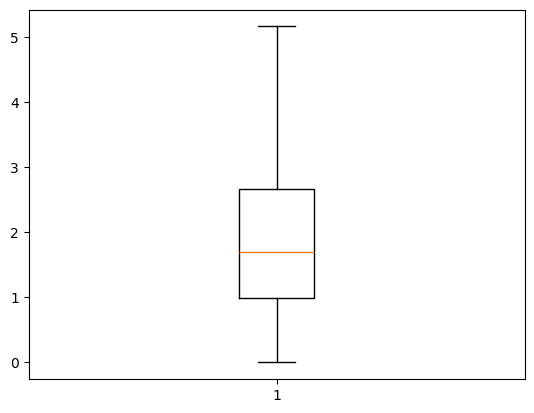

In [303]:
outliers_count = count_outliers_iqr(ammonium['hstWaarde_ammonium_2023'])
print(f"Number of outliers:  {outliers_count}")
plt.boxplot(ammonium['hstWaarde_ammonium_2023'])

<Axes: >

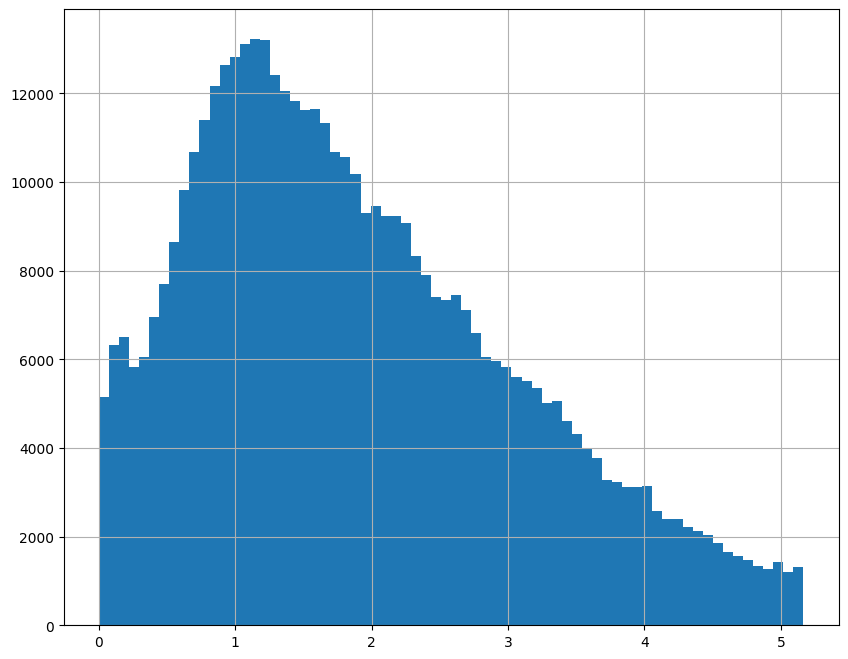

In [286]:
ammonium = remove_outliers_iqr(ammonium, 'hstWaarde_ammonium_2023')
ammonium['hstWaarde_ammonium_2023'].hist(bins=70, figsize=(10, 8))

In [287]:
nitrate = pd.read_parquet('data/Chemical measurements influent 2023_2024/nitrate_2024.parquet')
nitrate = nitrate.rename(columns={"hstWaarde": "hstWaarde_nitrate", "historianTagnummer": "historianTagnummer_nitrate"}).reset_index(drop=True)
nitrate['hstWaarde_nitrate'] = nitrate['hstWaarde_nitrate'].apply(pd.to_numeric, errors='coerce')

Number of outliers:  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d80e42300>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d80e42870>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d844b0590>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d80e42d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d80e42f00>],
 'means': []}

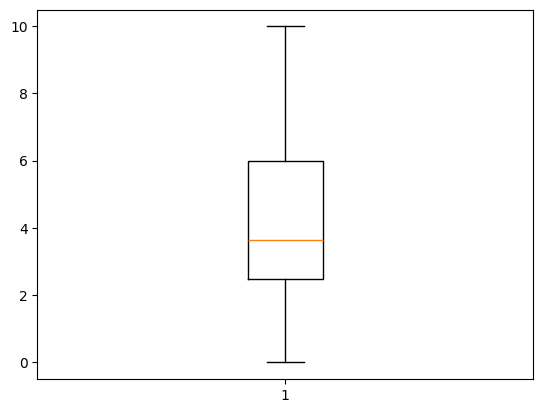

In [288]:
outliers_count = count_outliers_iqr(nitrate['hstWaarde_nitrate'])
print(f"Number of outliers:  {outliers_count}")
plt.boxplot(nitrate['hstWaarde_nitrate'])

<Axes: >

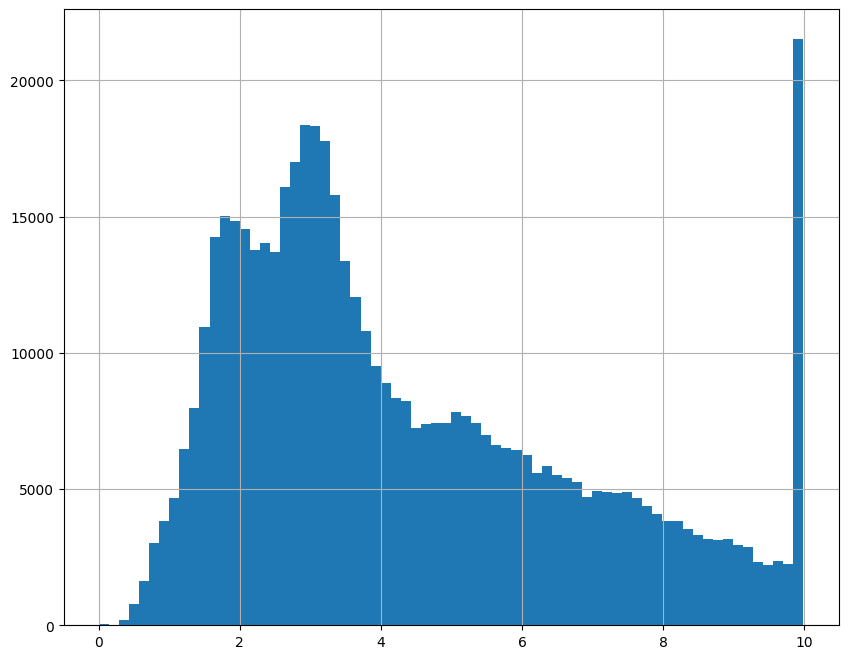

In [289]:
nitrate = remove_outliers_iqr(nitrate, 'hstWaarde_nitrate')
nitrate['hstWaarde_nitrate'].hist(bins=70, figsize=(10, 8))

In [290]:
phosphate = pd.read_parquet('data/Chemical measurements influent 2023_2024/phosphate_2024.parquet')
phosphate = phosphate.rename(columns={"hstWaarde": "hstWaarde_phosphate", "historianTagnummer": "historianTagnummer_phosphate"}).reset_index(drop=True)
phosphate['hstWaarde_phosphate'] = phosphate['hstWaarde_phosphate'].apply(pd.to_numeric, errors='coerce')

Number of outliers:  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d84d843b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d84b58890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d84d841a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d84bf4fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d84bf6ba0>],
 'means': []}

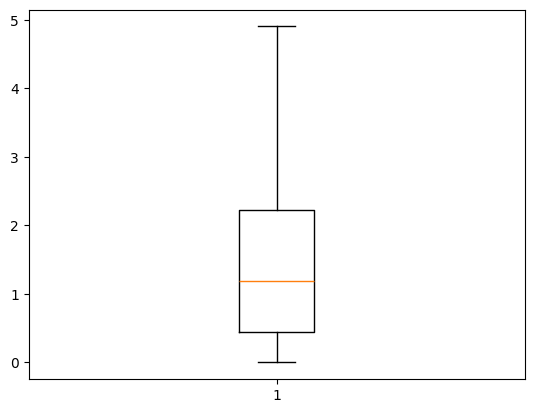

In [302]:
outliers_count = count_outliers_iqr(phosphate['hstWaarde_phosphate'])
print(f"Number of outliers:  {outliers_count}")
plt.boxplot(phosphate['hstWaarde_phosphate'])

<Axes: >

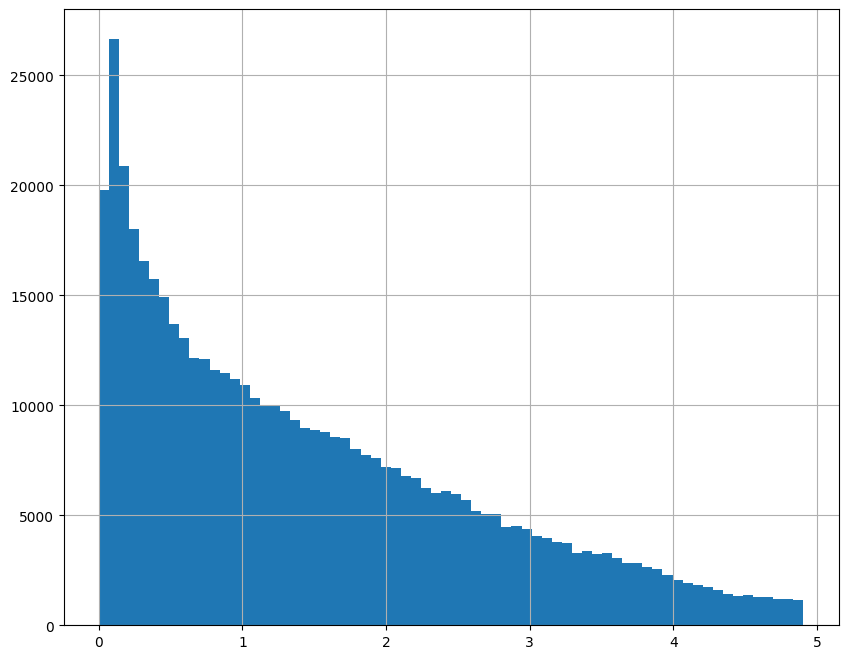

In [301]:
phosphate = remove_outliers_iqr(phosphate, 'hstWaarde_phosphate')
phosphate['hstWaarde_phosphate'].hist(bins=70, figsize=(10, 8))

In [304]:
ammonium_desc = ammonium.describe()
nitrate_desc = nitrate.describe()
phosphate_desc = phosphate.describe()

ammonium_desc.columns = [f'Ammonium_{col}' for col in ammonium_desc.columns]
nitrate_desc.columns = [f'Nitrate_{col}' for col in nitrate_desc.columns]
phosphate_desc.columns = [f'Phosphate_{col}' for col in phosphate_desc.columns]

summary_df = pd.concat([ammonium_desc, nitrate_desc, phosphate_desc], axis=1)
summary_df

,Ammonium_hstWaarde_ammonium_2023,Nitrate_hstWaarde_nitrate,Phosphate_hstWaarde_phosphate
count,467054.000000,525049.000000,495965.000000
mean,1.905225,4.384240,1.465640
std,1.168827,2.461896,1.192599
min,0.000000,0.000000,0.000000
25%,0.998000,2.482000,0.450000
50%,1.699000,3.635000,1.184000
75%,2.665000,6.004000,2.232000
max,5.165000,9.990000,4.905000


In [282]:
water_flow = pd.read_parquet('data/Influent_Flow_2023.parquet')
water_flow = water_flow.rename(columns={"hstWaarde": "hstWaarde_water"}).reset_index(drop=True)
water_flow['hstWaarde_water'] = water_flow['hstWaarde_water'].apply(pd.to_numeric, errors='coerce')

In [305]:
chemicals = pd.concat([ammonium, nitrate, phosphate], axis=1)
chemicals = chemicals.drop(columns=['waardebewerkingsmethodeCode', 'datumBeginMeting', 'datumEindeMeting', 
                                    'historianTagnummer_ammonium', 'datumBeginMeting_ammonium', 'datumEindeMeting_ammonium',
                                    'historianTagnummer_nitrate', 'historianTagnummer_phosphate'])
chemicals['hstWaarde_ammonium_2023'] = chemicals['hstWaarde_ammonium_2023'].fillna(chemicals['hstWaarde_ammonium_2023'].median())
chemicals

,hstWaarde_ammonium_2023,hstWaarde_nitrate,hstWaarde_phosphate
0,1.310,4.730,0.001
1,1.251,4.730,0.001
2,1.182,4.730,0.000
3,1.181,4.675,0.000
4,1.179,4.605,0.000
...,...,...,...
524703,1.699,9.956,1.171
524704,1.699,9.954,1.160
524705,1.699,9.953,1.089
524706,1.699,9.951,0.937


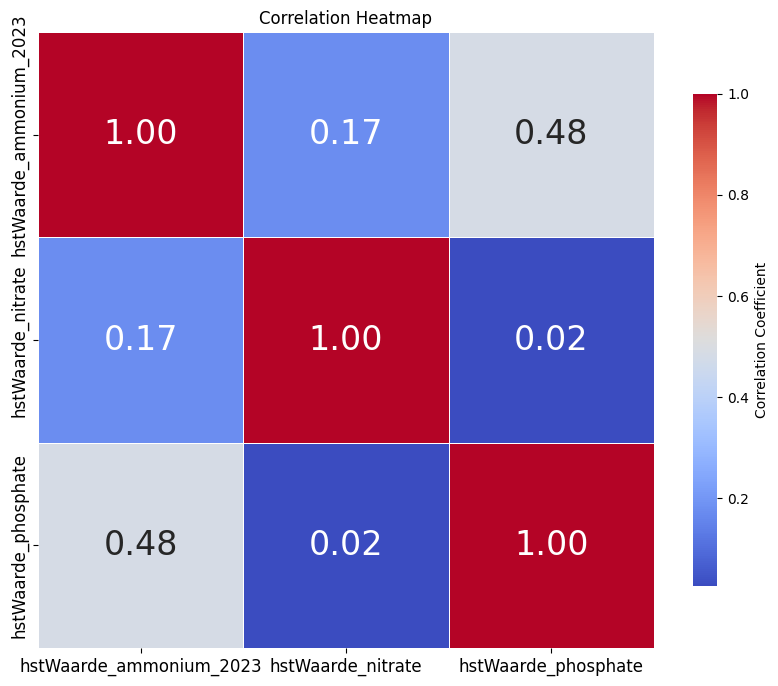

In [306]:
chemicalsForCorr = chemicals[['hstWaarde_ammonium_2023', 'hstWaarde_nitrate', 'hstWaarde_phosphate']]
corr = chemicalsForCorr.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 24},       # Font size for numbers
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Optional
)
plt.show()

Text(0.5, 1.0, 'Distribution of ammonium in 2021')

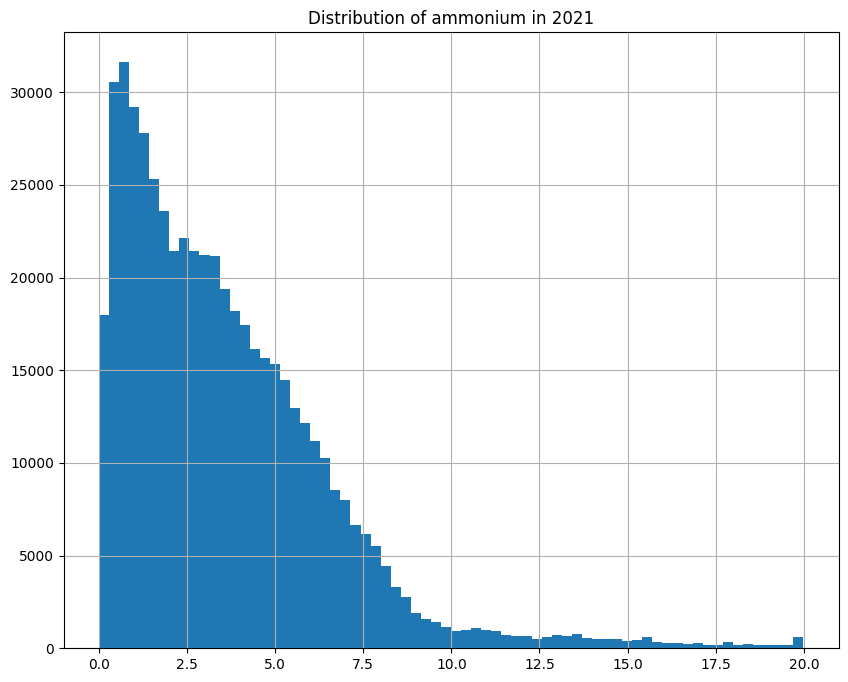

In [252]:
sensor_13 = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Data/EDE_B121069913_K600.MTW.parquet')
sensor_13['hstWaarde'] = sensor_13['hstWaarde'].apply(pd.to_numeric, errors='coerce')
sensor_13 = sensor_13.rename(columns={"hstWaarde": "hstWaarde_ammonium_2021"}).reset_index(drop=True)
sensor_13.hist(bins=70, figsize=(10, 8))
plt.title(f'Distribution of ammonium in 2021')

Text(0.5, 1.0, 'Distribution of ammonium in 2023')

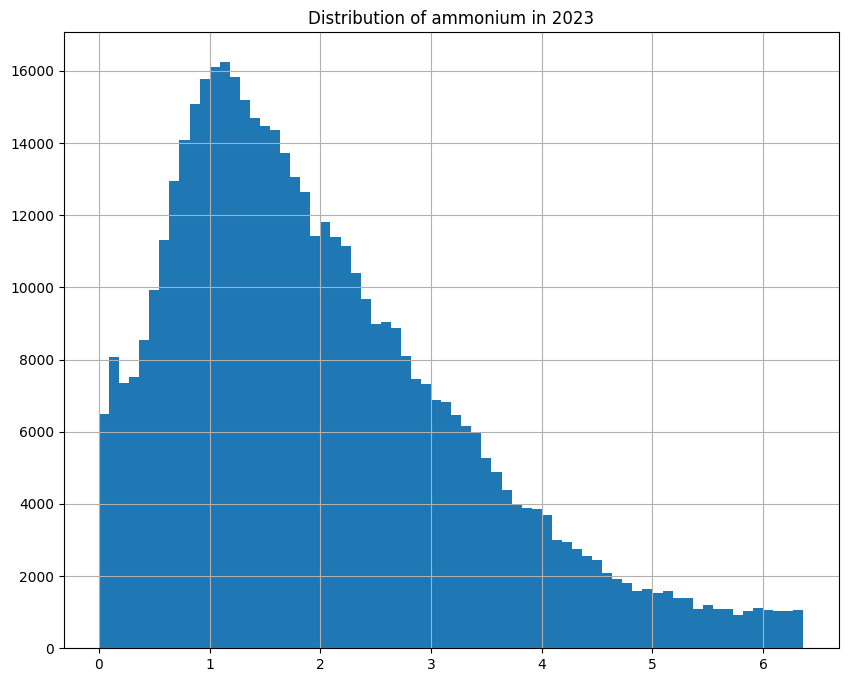

In [253]:
ammonium.hist(bins=70, figsize=(10, 8))
plt.title(f'Distribution of ammonium in 2023')

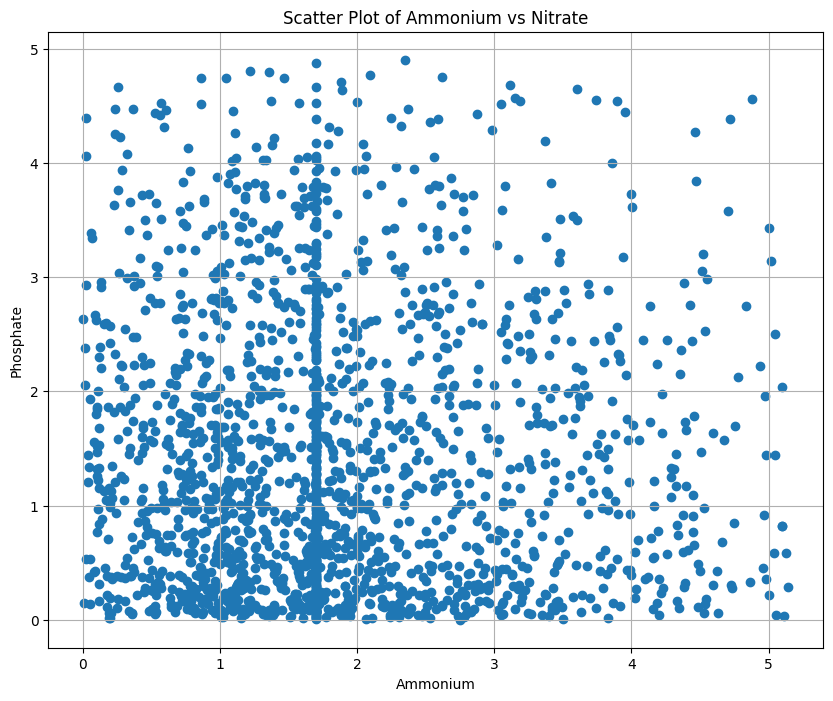

In [317]:
plt.figure(figsize=(10, 8))
plt.scatter(chemicals['hstWaarde_ammonium_2023'].sample(2000), chemicals['hstWaarde_phosphate'].sample(2000))
plt.xlabel('Ammonium')
plt.ylabel('Phosphate')
plt.title('Scatter Plot of Ammonium vs Nitrate')
plt.grid(True)

In [314]:
oxygen_a = pd.read_parquet('data/OxygenData2024/oxygen_a_2024.parquet')
oxygen_a = oxygen_a.drop(columns=['waardebewerkingsmethodeCode'])
legacy_oxygen_a = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofA_EDE_B121069901_K600.MTW.parquet')
oxygen_a = oxygen_a.rename(columns={"hstWaarde": "hstWaarde_oxygen_a", "historianTagnummer": "historianTagnummer_oxygen_a"}).reset_index(drop=True)
oxygen_a['hstWaarde_oxygen_a'] = oxygen_a['hstWaarde_oxygen_a'].apply(pd.to_numeric, errors='coerce')

oxygen_b = pd.read_parquet('data/OxygenData2024/oxygen_b_2024.parquet')
oxygen_b = oxygen_b.drop(columns=['waardebewerkingsmethodeCode'])
legacy_oxygen_b = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofB_EDE_B121069907_K600.MTW.parquet')
oxygen_b = oxygen_b.rename(columns={"hstWaarde": "hstWaarde_oxygen_b", "historianTagnummer": "historianTagnummer_oxygen_b"}).reset_index(drop=True)
oxygen_b['hstWaarde_oxygen_b'] = oxygen_b['hstWaarde_oxygen_b'].apply(pd.to_numeric, errors='coerce')

In [315]:
combines_oxygen = pd.concat([oxygen_a, oxygen_b], axis=1)
combines_oxygen['Average_value'] = (combines_oxygen['hstWaarde_oxygen_a'] + combines_oxygen['hstWaarde_oxygen_b']) / 2
combines_oxygen

,historianTagnummer_oxygen_a,hstWaarde_oxygen_a,datumBeginMeting,datumEindeMeting,historianTagnummer_oxygen_b,hstWaarde_oxygen_b,datumBeginMeting,datumEindeMeting,Average_value
0,EDE_B121069901_K600.MTW,1.663,2023-01-01 00:00:00,2023-01-01 00:01:00,EDE_B121069907_K600.MTW,0.777,2023-01-01 00:00:00,2023-01-01 00:01:00,1.2200
1,EDE_B121069901_K600.MTW,1.789,2023-01-01 00:01:00,2023-01-01 00:02:00,EDE_B121069907_K600.MTW,0.982,2023-01-01 00:01:00,2023-01-01 00:02:00,1.3855
2,EDE_B121069901_K600.MTW,2.105,2023-01-01 00:02:00,2023-01-01 00:03:00,EDE_B121069907_K600.MTW,1.189,2023-01-01 00:02:00,2023-01-01 00:03:00,1.6470
3,EDE_B121069901_K600.MTW,2.271,2023-01-01 00:03:00,2023-01-01 00:04:00,EDE_B121069907_K600.MTW,1.266,2023-01-01 00:03:00,2023-01-01 00:04:00,1.7685
4,EDE_B121069901_K600.MTW,2.168,2023-01-01 00:04:00,2023-01-01 00:05:00,EDE_B121069907_K600.MTW,1.403,2023-01-01 00:04:00,2023-01-01 00:05:00,1.7855
...,...,...,...,...,...,...,...,...,...
525044,EDE_B121069901_K600.MTW,1.635,2023-12-31 23:55:00,2023-12-31 23:56:00,EDE_B121069907_K600.MTW,0.596,2023-12-31 23:55:00,2023-12-31 23:56:00,1.1155
525045,EDE_B121069901_K600.MTW,1.841,2023-12-31 23:56:00,2023-12-31 23:57:00,EDE_B121069907_K600.MTW,0.726,2023-12-31 23:56:00,2023-12-31 23:57:00,1.2835
525046,EDE_B121069901_K600.MTW,1.816,2023-12-31 23:57:00,2023-12-31 23:58:00,EDE_B121069907_K600.MTW,0.843,2023-12-31 23:57:00,2023-12-31 23:58:00,1.3295
525047,EDE_B121069901_K600.MTW,1.812,2023-12-31 23:58:00,2023-12-31 23:59:00,EDE_B121069907_K600.MTW,0.880,2023-12-31 23:58:00,2023-12-31 23:59:00,1.3460


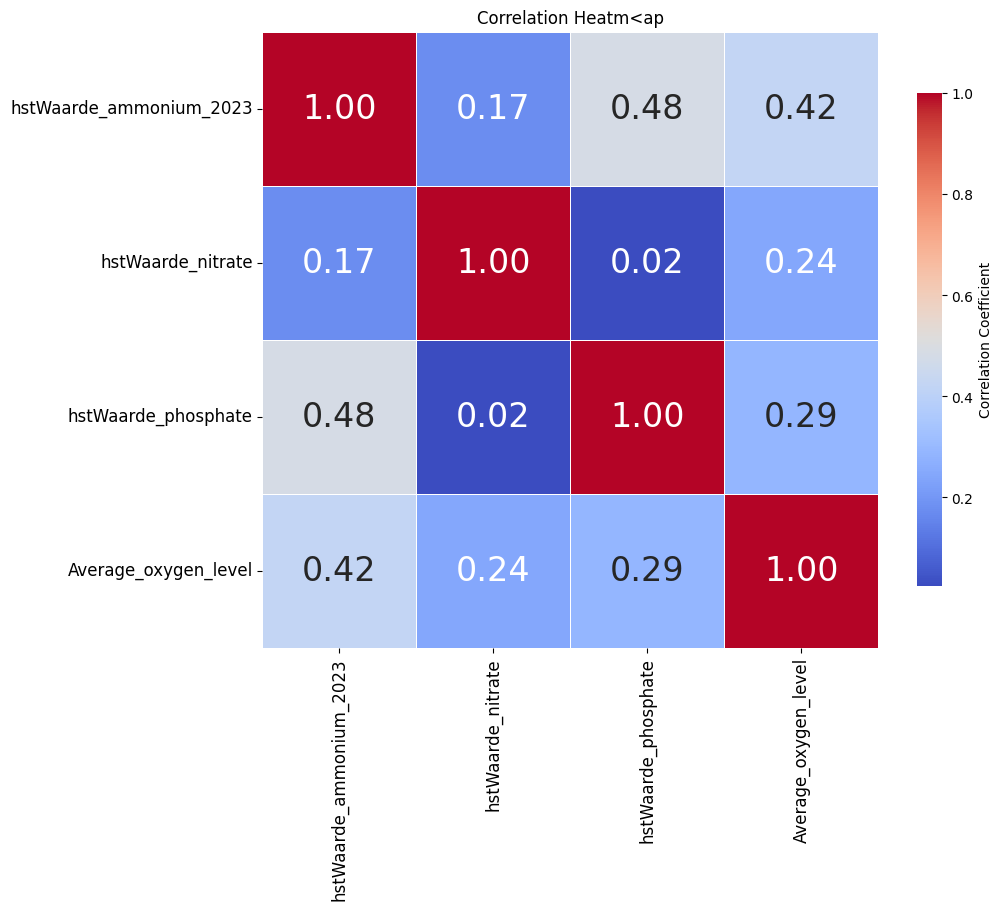

In [316]:
chemicals['Average_oxygen_level'] = combines_oxygen['Average_value']
chemicals.dropna()
ObjectsForCorr = chemicals[['hstWaarde_ammonium_2023', 'hstWaarde_nitrate', 'hstWaarde_phosphate', 'Average_oxygen_level']]
corr = ObjectsForCorr.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatm<ap")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 24},       # Font size for numbers
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Optional
)
plt.show()